Introduction to LinkedIn Analysis:

LinkedIn has emerged as a powerful platform for professionals and businesses to connect, share insights, and engage with a global audience. As an invaluable resource for networking, recruiting, and content dissemination, LinkedIn offers a wealth of opportunities to leverage data-driven insights for optimizing your presence and impact on the platform.

In this comprehensive LinkedIn analysis, we delve into various facets of user engagement, content performance, and user behavior. By scrutinizing key metrics such as impressions, engagements, likes, comments, shares, and more, we aim to uncover meaningful patterns and trends that can inform your LinkedIn content strategy.

This analysis presents a detailed examination of LinkedIn engagement across different content types, months, days of the week, and hours of the day. Additionally, we explore the correlations between various engagement metrics and uncover the impact of content types on user interaction. These insights will empower you to make data-driven decisions, refine your content approach, and enhance your ability to connect with your target audience on LinkedIn.

Whether you are an individual professional looking to enhance your personal brand, a business seeking to expand its reach and influence, or a content creator aiming to maximize engagement, this LinkedIn analysis will provide valuable guidance to help you succeed on this dynamic and influential social media platform.

In [1]:
#importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import set_option
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from prophet import Prophet
from textblob import TextBlob
plt.style.use('fivethirtyeight')
from wordcloud import WordCloud
import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = 'C:\\Users\\HP\\Documents\\WORKSPACE\\Post Performance (Stanbic IBTC) January 1, 2013 - July 13, 2023_LinkedIn.xls'
df = pd.read_excel(data)

In [3]:
# Set pandas options to display all columns
pd.set_option('display.max_columns', None)

In [4]:
df.head(5)

,Date,Post ID,Network,Post Type,Content Type,Profile,Sent by,Link,Post,Linked Content,Impressions,Organic Impressions,Viral Impressions,Non-viral Impressions,Paid Impressions,Fan Impressions,Fan Organic Impressions,Fan Paid Impressions,Non-fan Impressions,Non-fan Organic Impressions,Non-fan Paid Impressions,Reach,Organic Reach,Viral Reach,Non-viral Reach,Paid Reach,Fan Reach,Fan Paid Reach,Potential Reach,Engagement Rate (per Impression),Engagement Rate (per Reach),Engagements,Reactions,Likes,Dislikes,Love Reactions,Haha Reactions,Wow Reactions,Sad Reactions,Angry Reactions,Comments,Shares,Saves,Click-Through Rate,Post Link Clicks,Other Post Clicks,Post Clicks (All),Post Media Clicks,Post Hashtag Clicks,Post Detail Expand Clicks,Profile Clicks,Post Photo View Clicks,Post Video Play Clicks,Other Engagements,Answers,App Engagements,App Install Attempts,App Opens,Follows from Post,Unfollows from Post,Negative Feedback,bit.ly Link Clicks,Engaged Users,Engaged Fans,Users Talking About This,Unique Reactions,Unique Comments,Unique Shares,Unique Answers,Unique Post Clicks,Unique Post Link Clicks,Unique Post Photo View Clicks,Unique Post Video Play Clicks,Unique Other Post Clicks,Unique Negative Feedback,Subscribers Gained from Video,Annotation Clicks,Card Clicks,Video Views,Media Views,Organic Video Views,Paid Video Views,Partial Video Views,Organic Partial Video Views,Paid Partial Video Views,Full Video Views,Full Video View Rate,Follow Video Views,For You Video Views,Hashtag Video Views,Business Account Video Views,Sound Video Views,Unspecified Video Views,Organic Full Video Views,Paid Full Video Views,Autoplay Video Views,Click to Play Video Views,Sound on Video Views,Sound off Video Views,10-Second Video Views,Organic 10-Second Video Views,Paid 10-Second Video Views,Autoplay 10-Second Video Views,Click to Play 10-Second Video Views,Sound on 10-Second Video Views,Sound off 10-Second Video Views,Autoplay Partial Video Views,Click to Play Partial Video Views,Autoplay Full Video Views,Click to Play Full Video Views,95% Video Views,Organic 95% Video Views,Paid 95% Video Views,Video Length (Seconds),Average Video Time Watched (Seconds),Video View Time (Seconds),Organic Video View Time (Seconds),Paid Video View Time (Seconds),Unique Video Views,Unique Organic Video Views,Unique Paid Video Views,Unique 10-Second Video Views,Unique Full Video Views,Unique Organic 95% Video Views,Unique Paid 95% Video Views,Video Ad Break Ad Impressions,Video Ad Break Ad Earnings,Video Ad Break Ad Cost per Impression (CPM),YouTube Premium Views,Estimated Minutes Watched,Estimated Premium Minutes Watched,Story Taps Back,Story Taps Forward,Story Exits,Story Replies,Video Added to Playlists,Subscribers Lost from Video,Video Removed from Playlists,Annotation Impressions,Annotation Clickable Impressions,Annotation Closable Impressions,Annotation Closes,Card Impressions,Card Teaser Impressions,Card Teaser Clicks,Poll Votes,Tags
0,7/13/2023 12:03 pm,7085212016608449536,LinkedIn,Post,Photo,Stanbic IBTC,Blessing Ubah,https://linkedin.com/feed/update/urn:li:share:...,Your money should not be a gamble. Before you ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CIB Posts
1,2023-12-07 20:00:00,7084969706024999936,LinkedIn,Post,Text,Stanbic IBTC,Blessing Ubah,https://linkedin.com/feed/update/urn:li:share:...,"What skill (s) do you have, that no one ever t...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [5]:
df.tail(5)

,Date,Post ID,Network,Post Type,Content Type,Profile,Sent by,Link,Post,Linked Content,Impressions,Organic Impressions,Viral Impressions,Non-viral Impressions,Paid Impressions,Fan Impressions,Fan Organic Impressions,Fan Paid Impressions,Non-fan Impressions,Non-fan Organic Impressions,Non-fan Paid Impressions,Reach,Organic Reach,Viral Reach,Non-viral Reach,Paid Reach,Fan Reach,Fan Paid Reach,Potential Reach,Engagement Rate (per Impression),Engagement Rate (per Reach),Engagements,Reactions,Likes,Dislikes,Love Reactions,Haha Reactions,Wow Reactions,Sad Reactions,Angry Reactions,Comments,Shares,Saves,Click-Through Rate,Post Link Clicks,Other Post Clicks,Post Clicks (All),Post Media Clicks,Post Hashtag Clicks,Post Detail Expand Clicks,Profile Clicks,Post Photo View Clicks,Post Video Play Clicks,Other Engagements,Answers,App Engagements,App Install Attempts,App Opens,Follows from Post,Unfollows from Post,Negative Feedback,bit.ly Link Clicks,Engaged Users,Engaged Fans,Users Talking About This,Unique Reactions,Unique Comments,Unique Shares,Unique Answers,Unique Post Clicks,Unique Post Link Clicks,Unique Post Photo View Clicks,Unique Post Video Play Clicks,Unique Other Post Clicks,Unique Negative Feedback,Subscribers Gained from Video,Annotation Clicks,Card Clicks,Video Views,Media Views,Organic Video Views,Paid Video Views,Partial Video Views,Organic Partial Video Views,Paid Partial Video Views,Full Video Views,Full Video View Rate,Follow Video Views,For You Video Views,Hashtag Video Views,Business Account Video Views,Sound Video Views,Unspecified Video Views,Organic Full Video Views,Paid Full Video Views,Autoplay Video Views,Click to Play Video Views,Sound on Video Views,Sound off Video Views,10-Second Video Views,Organic 10-Second Video Views,Paid 10-Second Video Views,Autoplay 10-Second Video Views,Click to Play 10-Second Video Views,Sound on 10-Second Video Views,Sound off 10-Second Video Views,Autoplay Partial Video Views,Click to Play Partial Video Views,Autoplay Full Video Views,Click to Play Full Video Views,95% Video Views,Organic 95% Video Views,Paid 95% Video Views,Video Length (Seconds),Average Video Time Watched (Seconds),Video View Time (Seconds),Organic Video View Time (Seconds),Paid Video View Time (Seconds),Unique Video Views,Unique Organic Video Views,Unique Paid Video Views,Unique 10-Second Video Views,Unique Full Video Views,Unique Organic 95% Video Views,Unique Paid 95% Video Views,Video Ad Break Ad Impressions,Video Ad Break Ad Earnings,Video Ad Break Ad Cost per Impression (CPM),YouTube Premium Views,Estimated Minutes Watched,Estimated Premium Minutes Watched,Story Taps Back,Story Taps Forward,Story Exits,Story Replies,Video Added to Playlists,Subscribers Lost from Video,Video Removed from Playlists,Annotation Impressions,Annotation Clickable Impressions,Annotation Closable Impressions,Annotation Closes,Card Impressions,Card Teaser Impressions,Card Teaser Clicks,Poll Votes,Tags
7755,2014-09-05 11:24:00,5870478259099029504,LinkedIn,Post,Photo,Stanbic IBTC,,https://linkedin.com/feed/update/urn:li:activi...,We understand that as a Nigerian living outsid...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7756,2014-08-05 14:15:00,5870158839160009728,LinkedIn,Post,Photo,Stanbic IBTC,,https://linkedin.com/feed/update/urn:li:activi...,When going for an interview these tips might b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7760 entries, 0 to 7759
Columns: 147 entries, Date to Tags
dtypes: float64(136), int64(1), object(10)
memory usage: 8.7+ MB


In [7]:
# Set pandas display options to show all columns without breaking
pd.set_option('display.max_columns', None)

# Calculate the sum of missing values in each column
missing_values_sum = df.isnull().sum()


In [8]:
# Iterate through the columns and display them with their missing values
for column, missing_count in missing_values_sum.items():
    print(f"{column}: {missing_count}")

Date: 0
Post ID: 0
Network: 0
Post Type: 0
Content Type: 0
Profile: 0
Sent by: 0
Link: 4
Post: 31
Linked Content: 7653
Impressions: 1428
Organic Impressions: 1428
Viral Impressions: 7760
Non-viral Impressions: 7760
Paid Impressions: 7760
Fan Impressions: 7760
Fan Organic Impressions: 7760
Fan Paid Impressions: 7760
Non-fan Impressions: 7760
Non-fan Organic Impressions: 7760
Non-fan Paid Impressions: 7760
Reach: 7760
Organic Reach: 7760
Viral Reach: 7760
Non-viral Reach: 7760
Paid Reach: 7760
Fan Reach: 7760
Fan Paid Reach: 7760
Potential Reach: 7760
Engagement Rate (per Impression): 1428
Engagement Rate (per Reach): 7760
Engagements: 1428
Reactions: 1428
Likes: 1428
Dislikes: 7760
Love Reactions: 7760
Haha Reactions: 7760
Wow Reactions: 7760
Sad Reactions: 7760
Angry Reactions: 7760
Comments: 1428
Shares: 1428
Saves: 7760
Click-Through Rate: 1428
Post Link Clicks: 1428
Other Post Clicks: 7760
Post Clicks (All): 1428
Post Media Clicks: 7760
Post Hashtag Clicks: 7760
Post Detail Expand C

In [9]:
# List of chosen features
chosen_features = ['Date', 'Content Type', 'Post','Impressions', 'Engagement Rate (per Impression)',
                  'Engagements','Likes','Comments','Shares','Click-Through Rate','Post Link Clicks']

The selection of these specific features was guided by a thoughtful consideration of the dataset's missing values. It was observed that these chosen features had a relatively low count of missing values, making them suitable for analysis. In contrast, certain other features either had no values at all or suffered from an excessive number of missing entries, rendering them less conducive for meaningful analysis. Thus, the decision to focus on the selected features stemmed from the desire to work with data that provided a balanced and informative foundation for further exploration.

In [10]:
# Select the chosen features from the DataFrame
df1 = df[chosen_features]

In [11]:
#checking for missing values in the selected features
df1.isnull().sum()

Date                                   0
Content Type                           0
Post                                  31
Impressions                         1428
Engagement Rate (per Impression)    1428
Engagements                         1428
Likes                               1428
Comments                            1428
Shares                              1428
Click-Through Rate                  1428
Post Link Clicks                    1428
dtype: int64

In [12]:
#checking the descriptive statistics of the data to ascertain the method to handle the missing values
df1.describe()

,Impressions,Engagement Rate (per Impression),Engagements,Likes,Comments,Shares,Click-Through Rate,Post Link Clicks
count,6332.000000,6332.000000,6332.000000,6332.000000,6332.000000,6332.000000,6332.000000,6332.000000
mean,1083.303696,0.071732,50.445515,15.752685,1.152874,1.407454,0.016059,32.132502
std,1416.178616,0.393051,201.627888,30.305455,7.766169,2.211412,0.026653,182.487536
min,1.000000,-0.012000,-23.000000,-103.000000,-16.000000,-6.000000,0.000000,0.000000
25%,476.000000,0.019000,11.000000,6.000000,0.000000,0.000000,0.005900,4.000000
50%,775.000000,0.026700,20.000000,10.000000,0.000000,1.000000,0.010300,8.000000
75%,1233.000000,0.036900,36.000000,17.000000,1.000000,2.000000,0.016525,17.000000
max,37889.000000,9.000000,6235.000000,957.000000,284.000000,26.000000,0.583300,6089.000000


In [13]:
#Replace missing values with the median for numerical columns
numerical_cols = df1.select_dtypes(include=[np.number])  # Select only numerical columns
df1[numerical_cols.columns] = numerical_cols.fillna(numerical_cols.median())

In [14]:

#checking data after treating missing values
df1.isnull().sum()

Date                                 0
Content Type                         0
Post                                31
Impressions                          0
Engagement Rate (per Impression)     0
Engagements                          0
Likes                                0
Comments                             0
Shares                               0
Click-Through Rate                   0
Post Link Clicks                     0
dtype: int64

In [15]:
#Drop rows with missing values
df1.dropna(inplace=True)

In [16]:
df1.isna().sum()

Date                                0
Content Type                        0
Post                                0
Impressions                         0
Engagement Rate (per Impression)    0
Engagements                         0
Likes                               0
Comments                            0
Shares                              0
Click-Through Rate                  0
Post Link Clicks                    0
dtype: int64

In [16]:
# Select the columns to plot
selected_features = ['Date', 'Content Type', 'Post','Impressions', 'Engagement Rate (per Impression)',
                  'Engagements','Likes','Comments','Shares','Click-Through Rate','Post Link Clicks']

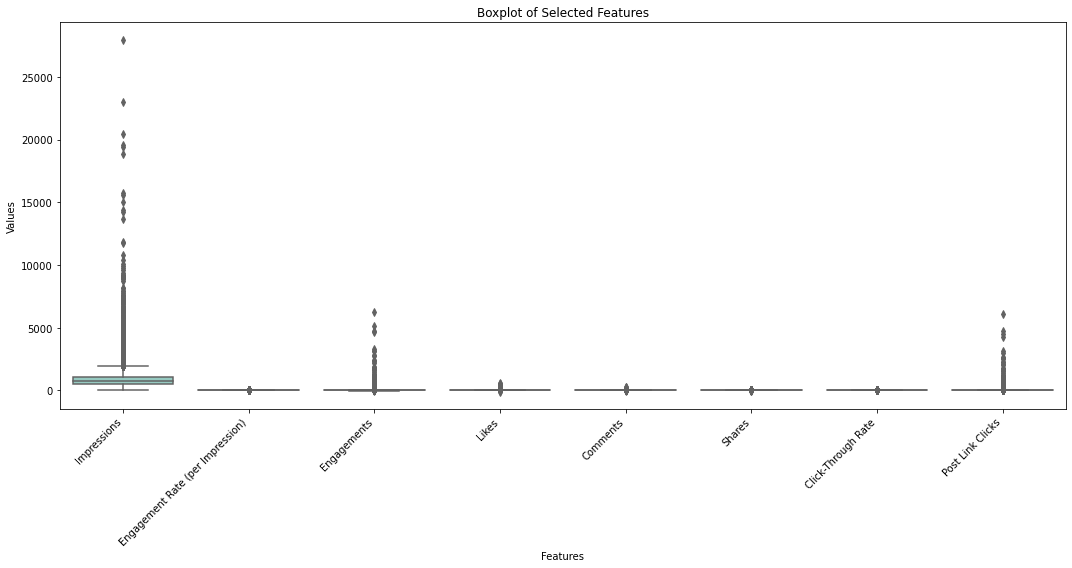

In [17]:
# Create a colorful boxplot
plt.figure(figsize=(15, 8))
sns.set_palette("Set3")  # Set a colorful palette
sns.boxplot(data=df1[selected_features])
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.xlabel("Features")
plt.ylabel("Values")
plt.title("Boxplot of Selected Features")

plt.tight_layout()
plt.show()

The insights gleaned from the boxplot analysis are quite revealing. Notably, several features, including Impressions, Engagements, and Post Link Clicks, exhibit outliers in the distribution. In the context of LinkedIn analysis, these outliers can be interpreted as positive indicators of content that garners exceptional user interaction and engagement. These exceptional data points suggest that certain posts or content pieces have resonated particularly well with the audience, resulting in significantly higher impressions, engagements, and link clicks compared to the majority of the content. Identifying and understanding the factors contributing to these outliers can provide valuable insights for optimizing content strategies and replicating the success of high-performing posts.

In [19]:
#descriptive statistics
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Impressions,7729.0,1017.704360,1166.505552,1.000,536.0000,775.0000,1089.0000,27949.0000
Engagement Rate (per Impression),7729.0,0.063568,0.356172,-0.012,0.0207,0.0267,0.0338,9.0000
Engagements,7729.0,44.322034,179.052643,-23.000,13.0000,20.0000,31.0000,6235.0000
Likes,7729.0,14.600207,25.333829,-103.000,7.0000,10.0000,15.0000,588.0000
Comments,7729.0,0.929745,6.962084,-16.000,0.0000,0.0000,0.0000,284.0000
Shares,7729.0,1.337172,2.006051,-6.000,0.0000,1.0000,2.0000,26.0000
Click-Through Rate,7729.0,0.014971,0.024124,0.000,0.0069,0.0103,0.0148,0.5833
Post Link Clicks,7729.0,27.270151,163.359004,0.000,4.0000,8.0000,13.0000,6089.0000


The descriptive statistics for the LinkedIn dataset provide valuable insights into the distribution of key metrics:

Impressions: The average number of impressions is approximately 1,018, with a wide range from 1 to 27,949. The data exhibits a positively skewed distribution, with a median (50th percentile) of 775. This suggests that while the majority of posts receive a moderate number of impressions, there are some posts that perform exceptionally well in terms of visibility.

Engagement Rate (per Impression): The mean engagement rate per impression is 0.064, with values ranging from negative to as high as 9. The standard deviation is relatively high at 0.356, indicating significant variability in engagement rates. The median engagement rate is 0.027. This indicates that while most posts have a relatively low engagement rate, there are some outliers with exceptionally high engagement rates.

Engagements: The average number of engagements per post is approximately 44, but this metric also exhibits significant variability, with a standard deviation of 179. The range of engagements is wide, from -23 to 6,235, highlighting the presence of both low and high-performing posts. The median number of engagements is 20.

Likes: The mean number of likes per post is around 14.6, with values ranging from -103 to 588. The data has a positively skewed distribution, with a median of 10. Like engagements tend to be relatively moderate, but there are some posts with notably higher like counts.

Comments: On average, there are approximately 0.93 comments per post, with values ranging from -16 to 284. The data is heavily right-skewed, with many posts having no comments (0). The median number of comments is also 0.

Shares: The average number of shares per post is approximately 1.34, with values ranging from -6 to 26. Similar to comments, the data is right-skewed, with a median of 1.

Click-Through Rate: The mean click-through rate (CTR) is 0.015, with values ranging from 0 to 0.583. The data suggests that while CTR tends to be relatively low for most posts, there are some outliers with higher CTR values.

Post Link Clicks: The average number of link clicks per post is about 27.27, with a wide range from 0 to 6,089. The data exhibits significant variability, with a standard deviation of 163. The median number of link clicks is 8.

In summary, the descriptive statistics reveal a wide variation in user engagement metrics on LinkedIn. While most posts tend to have moderate levels of engagement, there are clear outliers with exceptionally high or low engagement metrics. Understanding the factors contributing to these variations can inform content strategies and help identify opportunities for improving post performance.


# Creat more feature from the date column to enhance the analysis

In [18]:
# Convert 'Date' column to datetime format
df1['Date'] = pd.to_datetime(df1['Date'])

In [19]:
# Create new columns for year and time
df1['Year'] = df1['Date'].dt.year
df1['Time'] = df1['Date'].dt.time

In [20]:
# Function to extract the month
def extract_month(date):
    return date.strftime('%B')  # '%B' format returns the full month name

In [21]:
# Apply the extract_month function to create a new 'Month' column
df1['Month'] = df1['Date'].apply(extract_month)

In [22]:
# Define time of the day intervals
morning_start = pd.to_datetime('06:00:00').time()
afternoon_start = pd.to_datetime('12:00:00').time()
night_start = pd.to_datetime('18:00:00').time()

# Function to categorize time of day
def categorize_time_of_day(time):
    if time < morning_start:
        return 'Night'
    elif morning_start <= time < afternoon_start:
        return 'Morning'
    elif afternoon_start <= time < night_start:
        return 'Afternoon'
    else:
        return 'Night'

# Apply the categorize_time_of_day function to create a new column
df1['Time_of_Day'] = df1['Time'].apply(categorize_time_of_day)

# Now, df1 contains a 'Time_of_Day' column with morning, afternoon, or night values

In [23]:
# Extract the day of the week and create a new column for it
df1['Day_of_Week'] = df1['Date'].dt.day_name()

In [24]:
#Extract the hour of the day and create a new column for it
df1['Hour_of_Day'] = df1['Date'].dt.hour

In [25]:
df1.head()

,Date,Content Type,Post,Impressions,Engagement Rate (per Impression),Engagements,Likes,Comments,Shares,Click-Through Rate,Post Link Clicks,Year,Time,Month,Time_of_Day,Day_of_Week,Hour_of_Day
0,2023-07-13 12:03:00,Photo,Your money should not be a gamble. Before you ...,775.0,0.0267,20.0,10.0,0.0,1.0,0.0103,8.0,2023,12:03:00,July,Afternoon,Thursday,12
1,2023-12-07 20:00:00,Text,"What skill (s) do you have, that no one ever t...",775.0,0.0267,20.0,10.0,0.0,1.0,0.0103,8.0,2023,20:00:00,December,Night,Thursday,20
2,2023-12-07 19:00:00,Photo,Sade was able to acquire a home loan and make ...,63.0,0.0952,6.0,3.0,0.0,0.0,0.0476,3.0,2023,19:00:00,December,Night,Thursday,19
3,2023-11-07 14:49:00,Photo,Safeguard every aspect of your operations with...,164.0,0.0183,3.0,1.0,0.0,0.0,0.0122,2.0,2023,14:49:00,November,Afternoon,Tuesday,14
4,2023-11-07 09:17:00,Photo,"Together, we can make a difference and build a...",376.0,0.0505,19.0,11.0,0.0,0.0,0.0213,8.0,2023,09:17:00,November,Morning,Tuesday,9


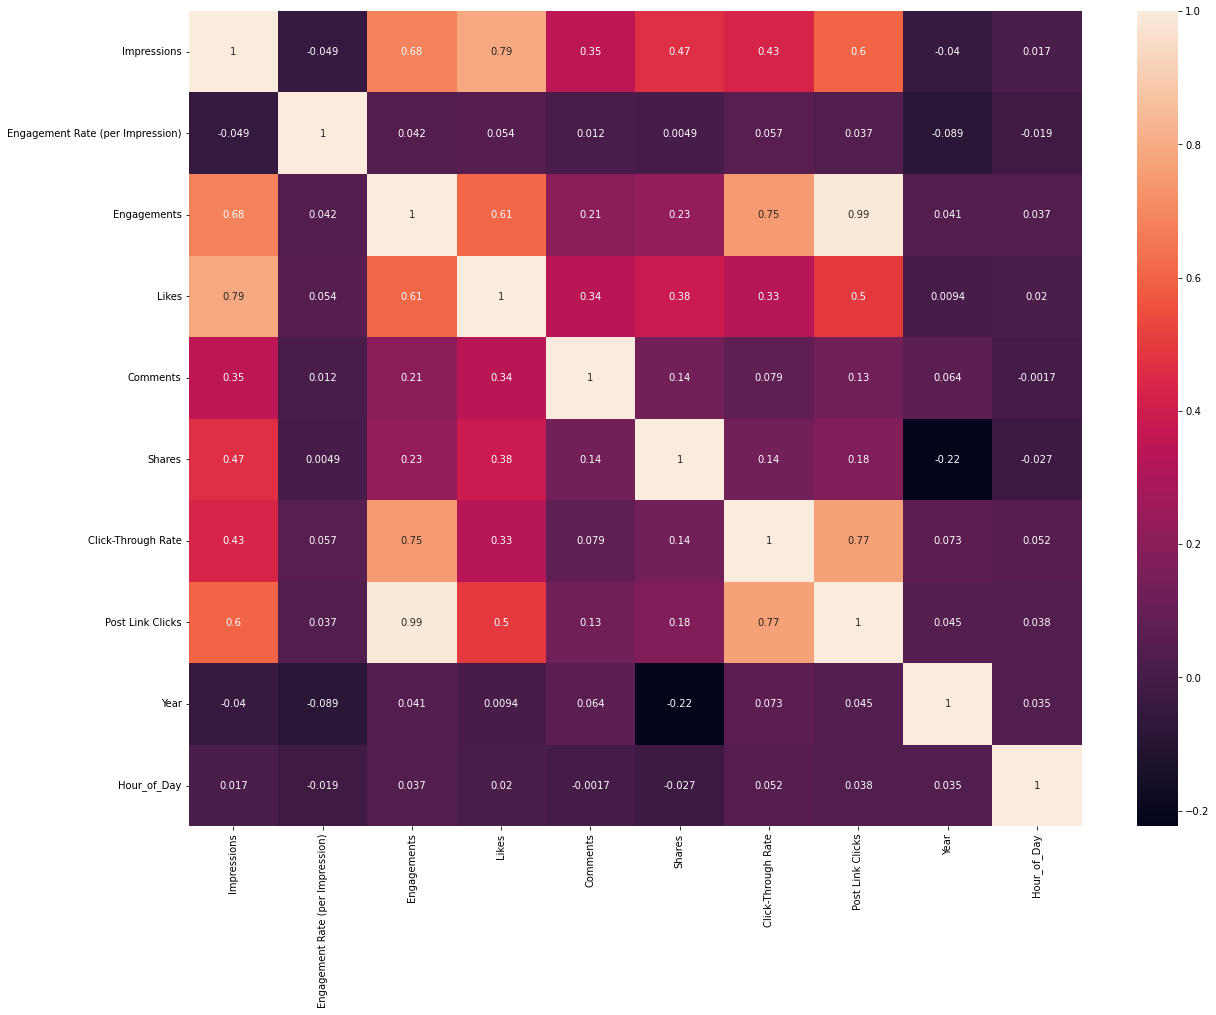

In [29]:
#heatmap showing the correlation of the variables
plt.figure(figsize = (20,15))
sns.heatmap(df1.corr(), annot = True) 
set_option ('display.width', 1000)

The heatmap analysis reveals several notable correlations among the key features in the LinkedIn dataset:

Impressions show a strong positive correlation with Post Link Clicks, Likes, and Engagements, all with correlation coefficients exceeding 0.6. This suggests that posts with higher impressions tend to also generate more link clicks, likes, and overall engagements.

Engagements exhibit positive correlations with Click Through Rate (CTR), Likes, Impressions, and the strongest correlation is observed with Post Link Clicks, having a remarkably high coefficient of 0.99. This indicates that posts with more link clicks tend to result in significantly higher engagement levels.

Likes display positive correlations with Post Link Clicks, Engagements, and Impressions, all having correlation coefficients above 0.6. Posts that receive more likes also tend to attract higher engagement and visibility.

Shares are positively correlated with Impressions but negatively correlated with the "Year" feature. This suggests that as impressions increase, shares also tend to increase, while the year has a diminishing effect on shares.

Click Through Rate (CTR) shows a positive correlation with Post Link Clicks and Engagements, both having coefficients above 0.7, indicating that posts with more link clicks tend to have higher CTR and engagement rates. CTR also has a positive but somewhat weaker correlation with Impressions, with a coefficient of 0.4.

These findings emphasize the interplay between various engagement metrics and visibility on LinkedIn. Posts that generate higher impressions, likes, and link clicks tend to result in more significant user engagement, underlining the importance of crafting content and strategies that drive these key interactions. Additionally, understanding the relationship between these metrics can inform content optimization efforts and help improve overall post performance.

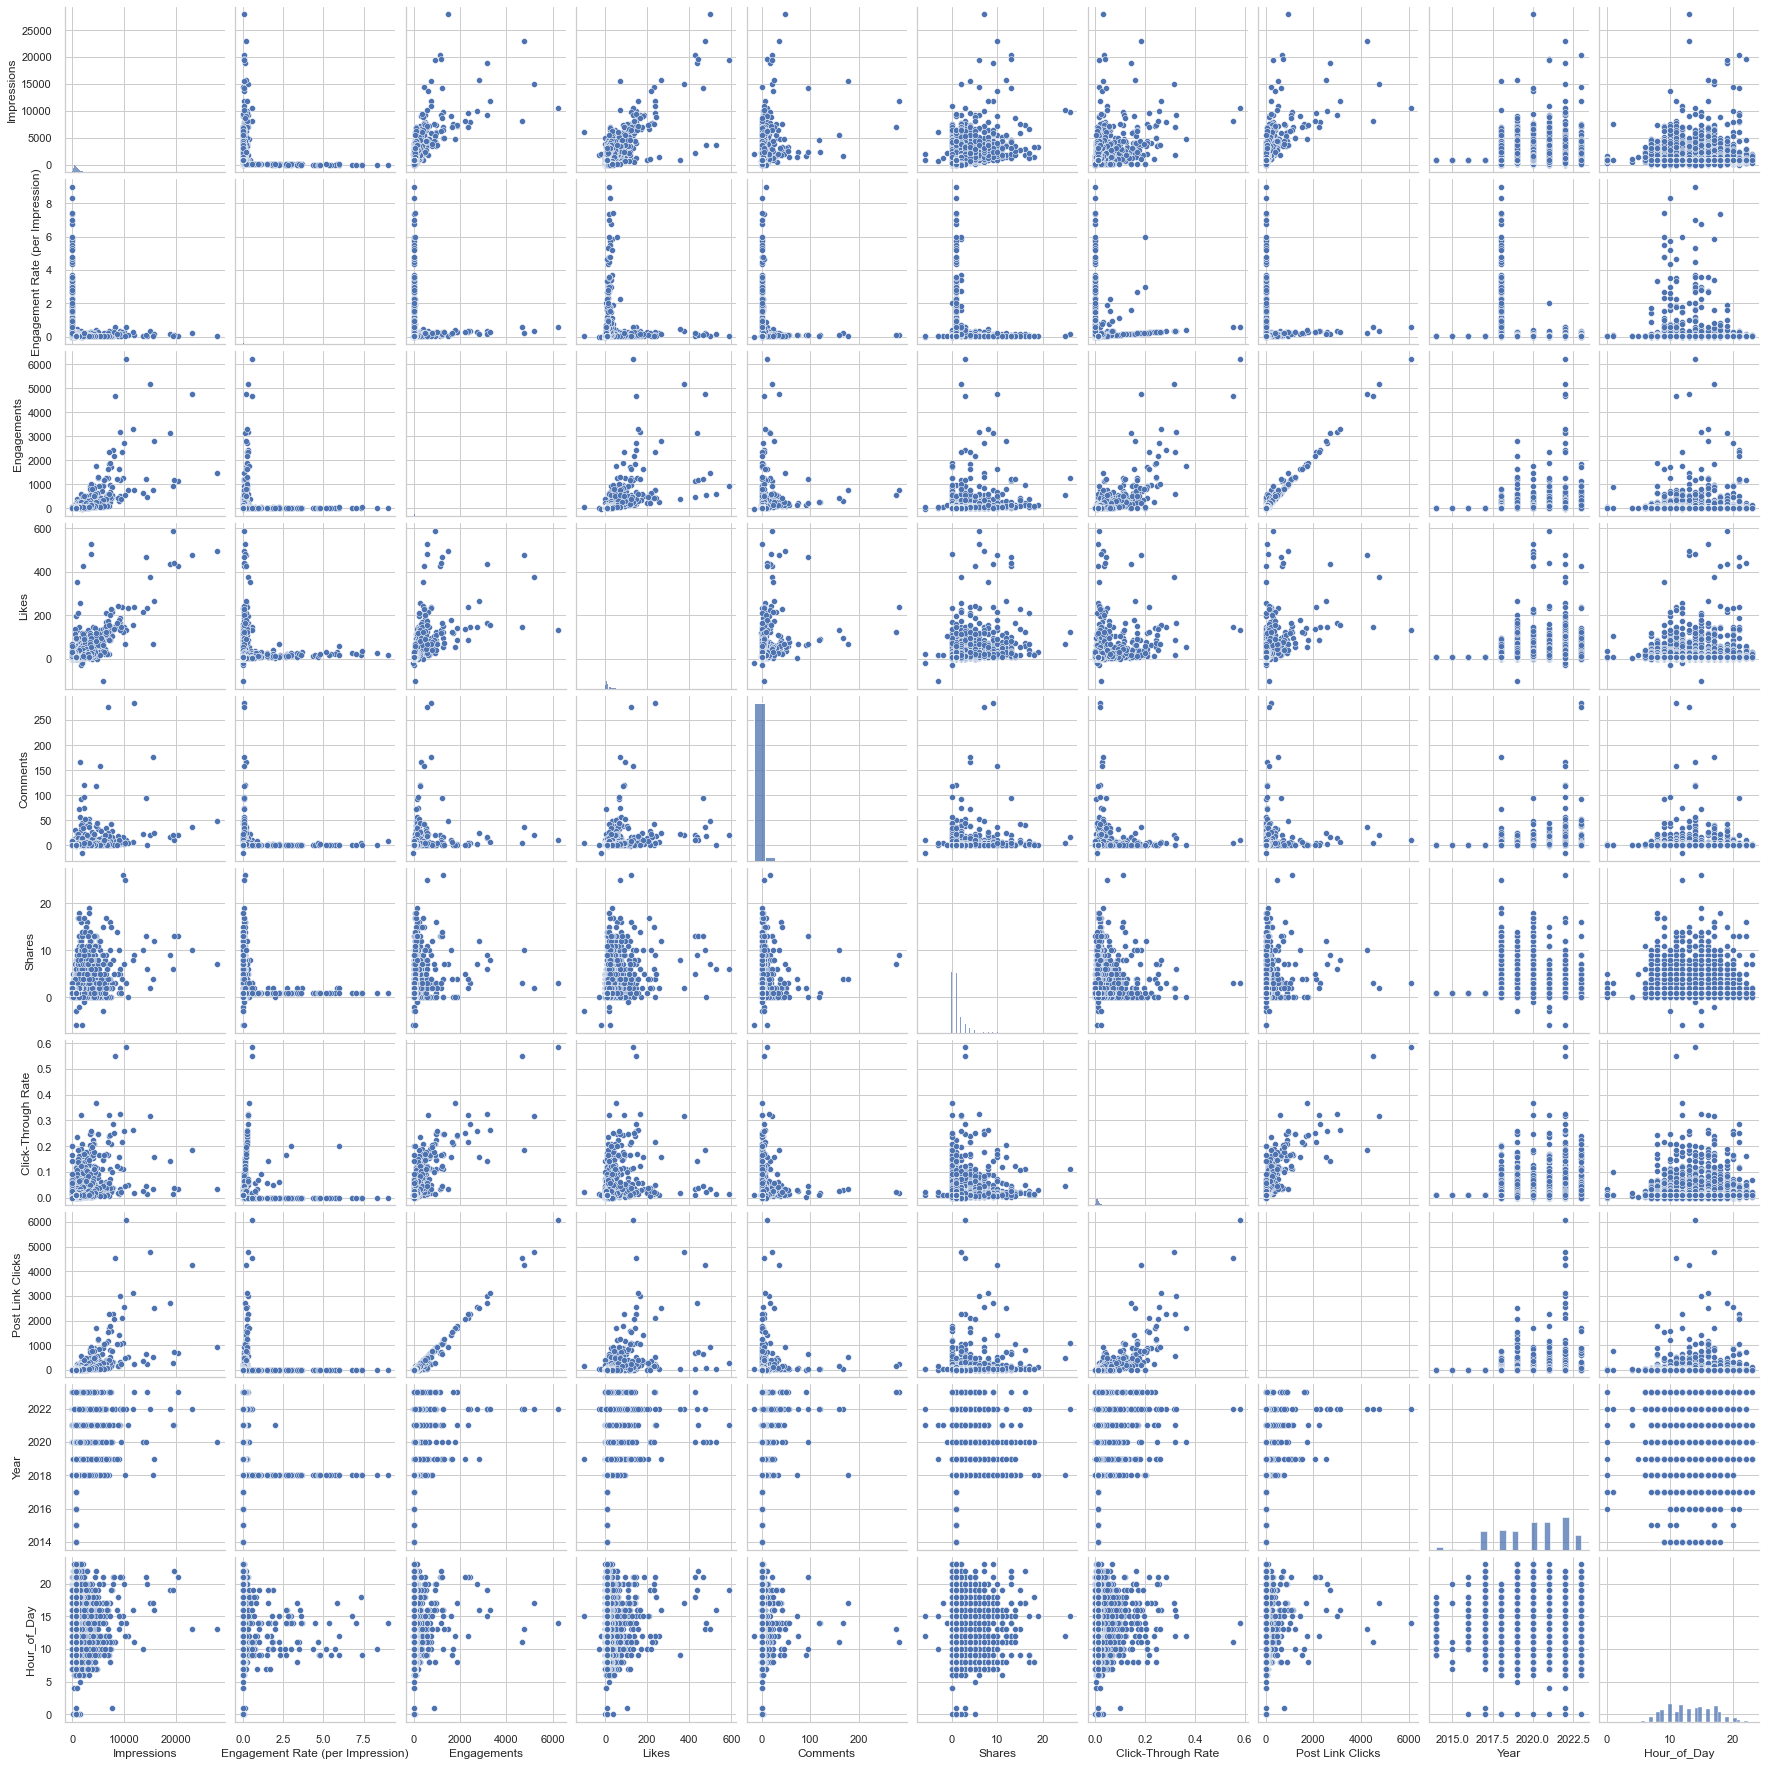

In [60]:
#pairpot to further see the relationships
sns.pairplot(df1)

The pairplot provides a visual representation of the relationships between different features in the dataset. It reinforces and visualizes the correlations that were initially observed in the heatmap analysis. By displaying scatterplots for pairs of variables, it offers a more intuitive understanding of how these features interact and influence each other. This graphical exploration allows for a deeper examination of the data, highlighting patterns, clusters, and potential outliers that might not be as apparent in tabular form. The pairplot serves as a valuable tool for gaining insights into the interplay between variables and can guide further analysis and decision-making.

In [30]:
#exploring the top 5 post with the highest likes
post = df1.groupby('Post')[['Likes']].sum().sort_values(by=['Likes'],ascending= False)


In [31]:
post.head(5)

,Likes
Post,
"Today we celebrate Dr. Ngozi Okonjo-Iweala for her hard work and diligence.\n\nFrom one feat to another, she has written not only her name but also ours on the map of the world.\n\nPhoto credit: WTO Website\n#ITCANBE\n#BeLikeNgoziChallenge\n#BlackHistoryMonth",588.0
"She always made me a happy and a better man. So, when my mom asked if I was sure I wanted to marry Nkem, my answer was a firm YES. \nIt's been 12 years since that conversation and I can't imagine living my best life with anyone else. ‚Äì Dotun\nSay yes to a happy and more fulfilling future with Stanbic IBTC Pensions. Kindly click here: https://lnkd.in/d-3jP6b to get started. #FutureMe",527.0
"We are pleased to inform you that Stanbic IBTC Capital has won 4 out of 9 awards namely: Best M&A House, Best M&A Deal of 2019, Best Commercial Paper House and Best Investment Bank. \n\nThis recognition was made at the recently held Association of Issuing Houses 2020 Investment Banking Awards. We thank all our esteemed clients for giving us the opportunity to partner with them for growth.\n\n\nFrom left: The Chief Executive, Stanbic IBTC Capital, Funso Akere; Executive Director, Stanbic IBTC Capital, Oyinda Akinyemi and President, Association of Issuing Houses of Nigeria, Ike Chioke.\n\n#ITCANBE",496.0
"Now is the time to ask yourself ""Will the #FutureMe be proud of my spending and saving choices of today?‚Äú let‚Äôs make smart money choices together.\nClick here https://lnkd.in/dgeZy9N to start your voluntary contribution today.\n#ItCanBe",481.0
"New branch alert! üòé\nWe are delighted to announce the opening of our Lagos Free Zone branch. \nWe are keeping our promise to support Nigerian dreams and drive Nigeria‚Äôs growth.\n""Come in"" Ibeju Lekki, we are here for you! üòä\n\n#ITCANBE",476.0


In [32]:
#exploring the top 5 post with the highest Engagements
eng = df1.groupby('Post')[['Engagements']].sum().sort_values(by=['Engagements'],ascending= False)


In [33]:
eng.head(5)

,Engagements
Post,
Do you know anyone that falls into these categories? üòÇ\n#WorkersDay2022\n#itcanbe,6235.0
"At Stanbic IBTC, we are obsessed with our customers and this is why our CE, Dr Demola Sogunle spent most of today engaging with customers at Ajose Adeogun branch. \n#CustomerServiceWeek\n#ITCANBE",5167.0
"New branch alert! üòé\nWe are delighted to announce the opening of our Lagos Free Zone branch. \nWe are keeping our promise to support Nigerian dreams and drive Nigeria‚Äôs growth.\n""Come in"" Ibeju Lekki, we are here for you! üòä\n\n#ITCANBE",4772.0
"Dear business owner, today we invite you to take advantage of our innovative solutions, sector expertise, strong heritage, footprint across the African continent and global partnerships to grow your business.\nHere's to growth and a formidable relationship ü•Ç\n#GoForGrowth\n#ITCANBE",4672.0
"More laurels! \n\nWe are excited to announce our impressive win of five awards at the Association of Issuing Houses of Nigeria (‚ÄúAIHN‚Äù) 2021 Investment Banking Awards! We emerged as the Best Investment Bank, Best M&A House, Best Bond House, Best Commercial Paper House, and Best Corporate Bond Deal. \nWe thank our clients for trusting us with their advisory, capital markets and financing transactions. \n\n#ITCANBE",3290.0


In [ ]:
#analysis on the content type that get the most engagements


In [40]:
#content type analysis
(df1['Content Type'].value_counts())

Photo       6489
Video        920
Text         209
Link         110
Document       1
Name: Content Type, dtype: int64

In [44]:
df1['Content Type'].unique()

array(['Photo', 'Text', 'Video', 'Document', 'Link'], dtype=object)

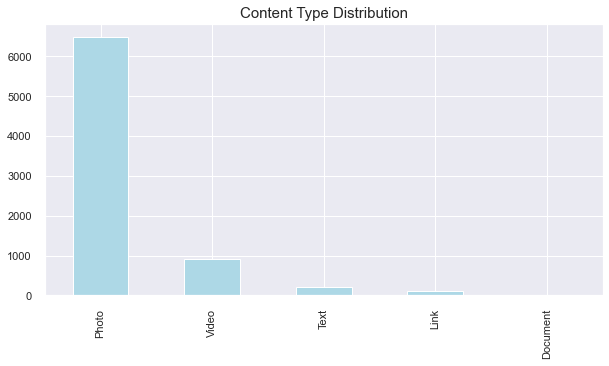

In [45]:
plt.style.use('seaborn')
sns.set(style="darkgrid")
plt.figure(figsize = (10, 5))
plt.title('Content Type Distribution', fontsize = 15)
df1['Content Type'].value_counts()[:5].plot(kind='bar', color='lightblue')
plt.show()

# CONTENT ANALYSIS BY KEY METRICS

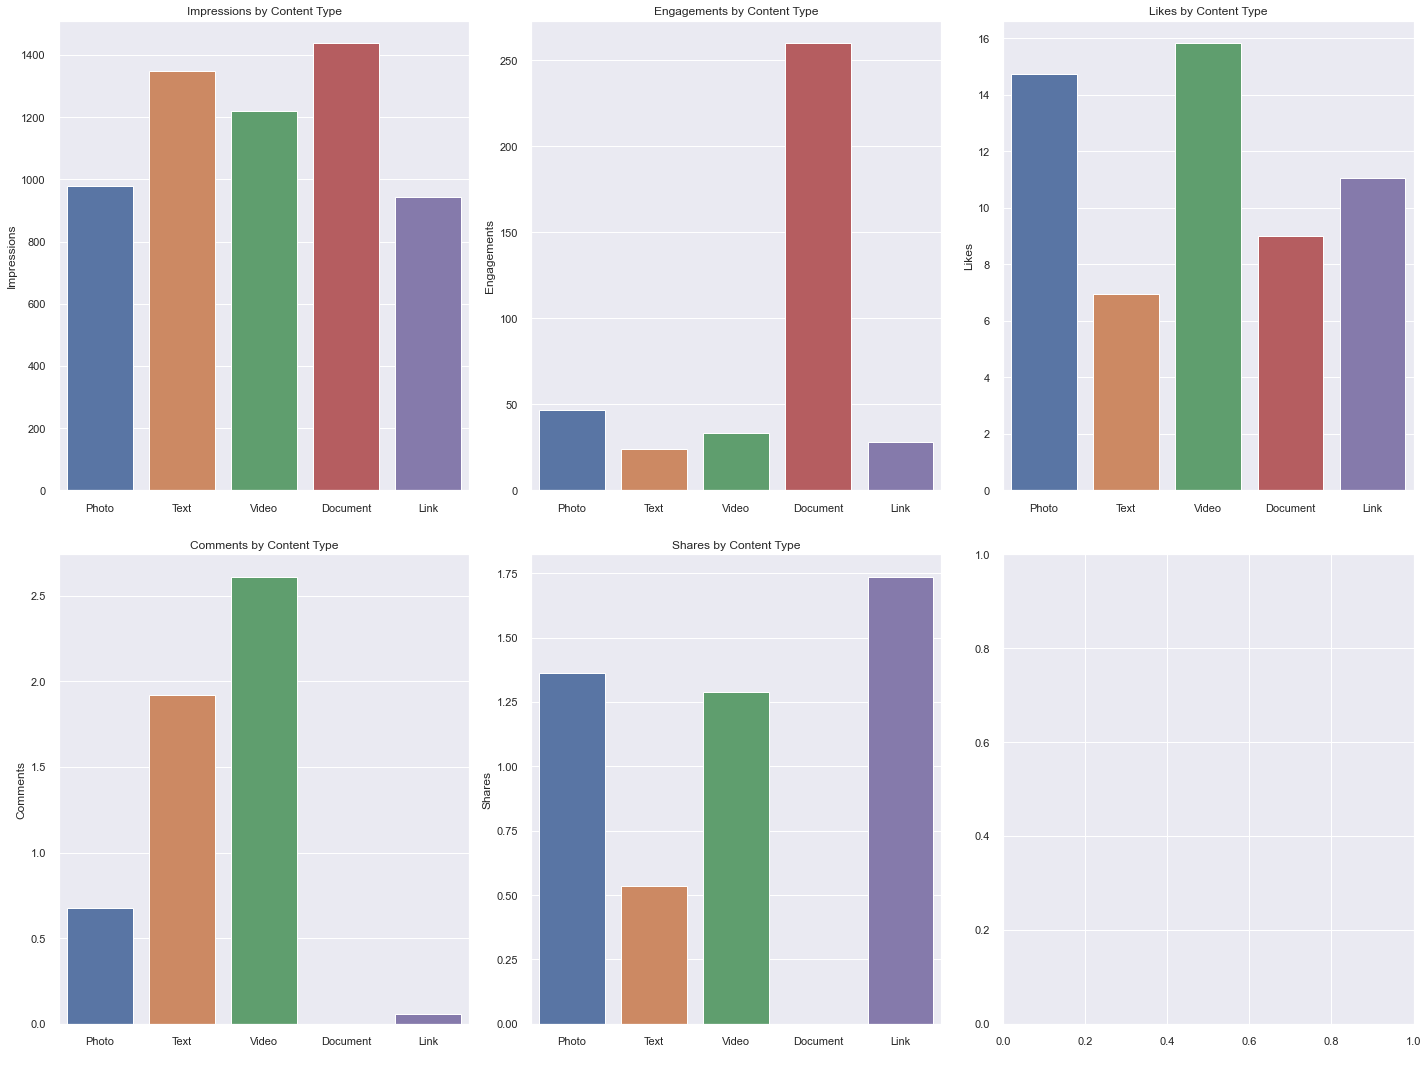

In [49]:
# Create subplots for each feature
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 15))
sns.set(style="whitegrid")

# List of features to analyze
features = ["Impressions", "Engagements", "Likes", "Comments", "Shares"]

# Iterate through each feature and create a bar chart
for i, feature in enumerate(features):
    row = i // 3
    col = i % 3
    
    # Create a bar chart for the current feature
    sns.barplot(x="Content Type", y=feature, data=df1, ax=axes[row, col], ci=None)
    axes[row, col].set_title(f"{feature} by Content Type")
    axes[row, col].set_xlabel(" ")
    axes[row, col].set_ylabel(feature)

# Adjust subplot layout
plt.tight_layout()

# Show the plots
plt.show()


After a comprehensive analysis of various content types across key metrics, the following insights have emerged:

Text, Video, and Documents: These content types garnered notably high impressions, indicating their ability to capture users' attention effectively.

Documents: Surprisingly, Documents outperformed other content types in terms of user engagement, and this difference was quite substantial. This suggests that Documents hold a unique appeal and encourage significant interaction from users.

Likes: Among the analyzed content types, Photos and Videos received the highest number of Likes. This indicates a strong affinity among users for visual content, reflecting the impact of visual storytelling on engagement.

Comments: Text and Video content attracted more user comments, signifying higher engagement levels. The frequency of comments can serve as a valuable gauge for measuring user interaction and interest in specific content.

Shares: Photos, Videos, and Links were the content types most commonly shared by users. This finding highlights the propensity of users to distribute these content formats, potentially amplifying their reach and impact.

In summary, these findings shed light on the diverse preferences and behaviors of users when interacting with different content types. Understanding these patterns can inform content creation and distribution strategies, enabling content creators to tailor their approach to resonate better with their target audience and boost overall engagement.

# SENTIMENT ANALYSIS

In [17]:
#plot the word cloud
font_path = 'C:\WINDOWS\Fonts\comici.ttf'

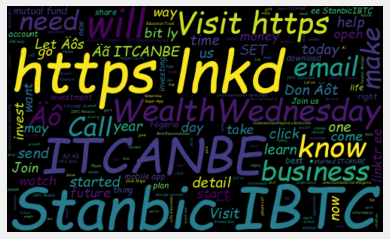

In [18]:
allWords = ' '.join([twts for twts in df1['Post']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=119, font_path= font_path).generate(allWords)

plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

This visualization simplifies complex textual data, making it easier to grasp the core ideas and focus areas. By identifying and emphasizing the words that occur frequently, the word cloud highlights the significant keywords and concepts present in the text, thereby providing a quick and intuitive overview of the dataset's content.

In [19]:
df6 = df1[['Post']]

In [20]:
#create a function to get subjectivity
def getSubjectivity (text):
    return TextBlob(text).sentiment.subjectivity
#create a function to get polarity    
def getPolarity (text):
        return TextBlob (text).sentiment.polarity
#create two new columns         
df6['Subjectivity'] = df6['Post'].apply(getSubjectivity)
df6['Polarity'] = df6['Post'].apply(getPolarity)

In [21]:
#show dataframe with new columns
df6

,Post,Subjectivity,Polarity
0,Your money should not be a gamble. Before you ...,0.480000,0.160000
1,"What skill (s) do you have, that no one ever t...",0.000000,0.000000
2,Sade was able to acquire a home loan and make ...,0.625000,0.500000
3,Safeguard every aspect of your operations with...,0.362500,0.200000
4,"Together, we can make a difference and build a...",0.000000,0.000000
...,...,...,...
7755,We understand that as a Nigerian living outsid...,0.308036,0.175000
7756,When going for an interview these tips might b...,0.509435,0.151446
7757,Are professional advisers important for small ...,0.500000,0.083333
7758,Do you own a business? Here's something on how...,0.533333,0.316667


In [22]:
#create a function for negative, neutral and positive analysis
def getAnalysis (score):
    if score < 0 :
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [23]:
df6 ['Analysis'] = df6['Polarity'].apply(getAnalysis)

In [24]:
#show the data frame 
df6

,Post,Subjectivity,Polarity,Analysis
0,Your money should not be a gamble. Before you ...,0.480000,0.160000,Positive
1,"What skill (s) do you have, that no one ever t...",0.000000,0.000000,Neutral
2,Sade was able to acquire a home loan and make ...,0.625000,0.500000,Positive
3,Safeguard every aspect of your operations with...,0.362500,0.200000,Positive
4,"Together, we can make a difference and build a...",0.000000,0.000000,Neutral
...,...,...,...,...
7755,We understand that as a Nigerian living outsid...,0.308036,0.175000,Positive
7756,When going for an interview these tips might b...,0.509435,0.151446,Positive
7757,Are professional advisers important for small ...,0.500000,0.083333,Positive
7758,Do you own a business? Here's something on how...,0.533333,0.316667,Positive


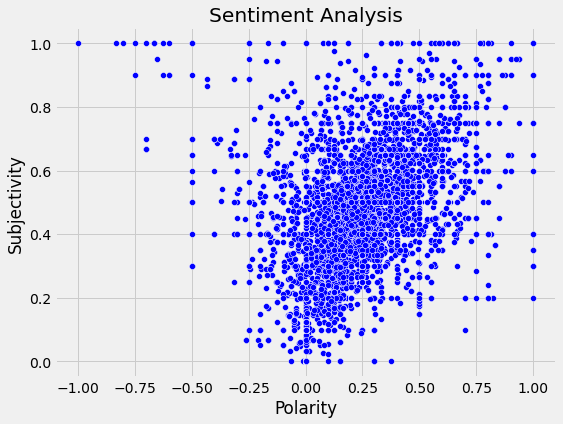

In [25]:
# Scatter plot for Polarity and Subjectivity
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df6, x='Polarity', y='Subjectivity', color='blue')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [26]:
#percentage of positive post
p_post = df6[df6.Analysis == 'Positive']
round((p_post.shape[0]/df6.shape[0])* 100, 1)

65.2

In [27]:
#percentage of negative post
n_post = df6[df6.Analysis == 'Negative']
round((n_post.shape[0]/df6.shape[0])* 100, 1)

6.7

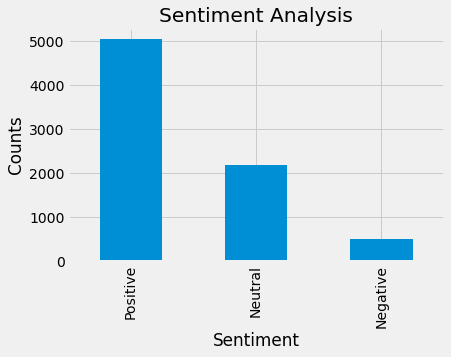

In [28]:
#show value counts analysis
df6['Analysis'].value_counts()

#visualize the counts
plt.title ('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df6['Analysis'].value_counts().plot(kind = 'bar')
plt.show()


Based on the sentiment analysis conducted, a notable trend emerges in the sentiment distribution of the posts. The analysis reveals that a substantial majority of the posts fall within the positive sentiment region.

# Time analysis

In [27]:
# Explore imppressions by month
imp_by_month = df1.groupby('Month')['Impressions'].mean()
#Explore impressions by time of day
time_by_day = df1.groupby('Time_of_Day')['Impressions'].mean()
#Explore impressions by day of the week
day_of_week = df1.groupby('Day_of_Week')['Impressions'].mean()
#explore impressions by hour of day
hour_of_day = df1.groupby('Hour_of_Day')['Impressions'].mean()

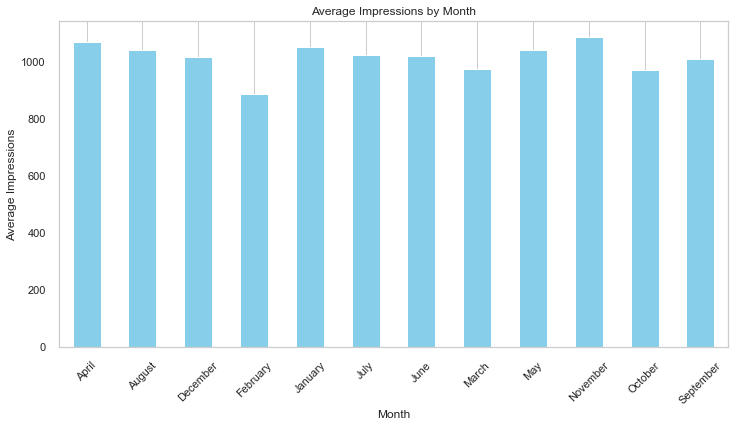

In [65]:
#Plot impressions by month
plt.figure(figsize=(12, 6))
imp_by_month.plot(kind='bar', color='skyblue')
plt.title('Average Impressions by Month')
plt.xlabel('Month')
plt.ylabel('Average Impressions')
plt.xticks(rotation=45)
plt.grid(axis='y')

The chart provides a comprehensive view of LinkedIn engagement over the course of several months. What's evident from this analysis is the consistency in Impression levels across most months. There are no stark fluctuations or significant differences that stand out, indicating a stable trend in user interactions with content. However, it's worth noting a minor dip in Impressions during February. While this decline is relatively small and doesn't deviate dramatically from the overall pattern, it could be an interesting point of investigation to understand the underlying factors contributing to this subtle variation in impressions during that particular month.

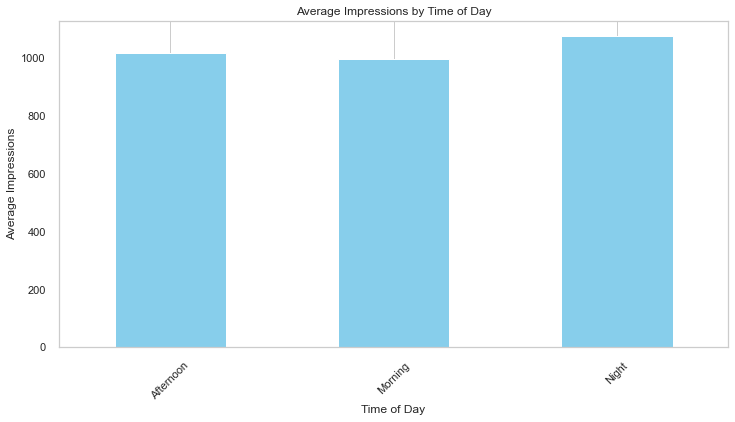

In [57]:
# Plot impressions by time of day
plt.figure(figsize=(12, 6))
time_by_day.plot(kind='bar', color='skyblue')
plt.title('Average Impressions by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Impressions')
plt.xticks(rotation=45)
plt.grid(axis='y')

The analysis of impressions throughout the day on LinkedIn reveals a fairly consistent pattern, with no major variations in content visibility. However, it's noteworthy that there is a subtle improvement in impressions during the nighttime. While this increase isn't substantial enough to be considered a significant shift, it does indicate a slight uptick in content visibility and user engagement during the evening and nighttime periods. 

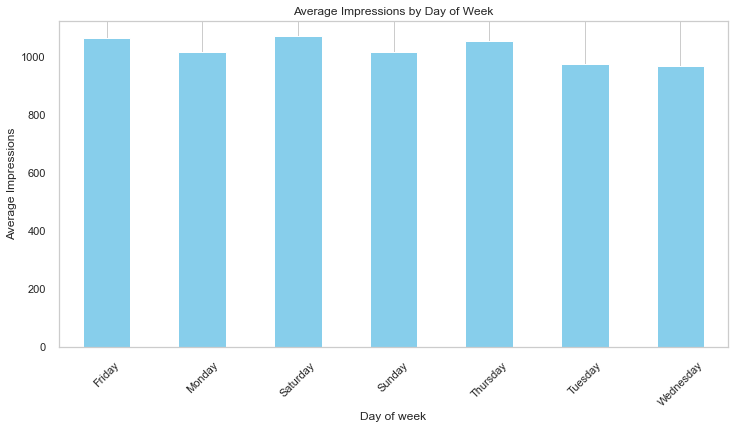

In [58]:
# Plot impressions by day of week
plt.figure(figsize=(12, 6))
day_of_week .plot(kind='bar', color='skyblue')
plt.title('Average Impressions by Day of Week')
plt.xlabel('Day of week')
plt.ylabel('Average Impressions')
plt.xticks(rotation=45)
plt.grid(axis='y')

The analysis of impressions across the days of the week on LinkedIn reveals a generally favorable impression trend, with consistent levels throughout most weekdays. However, there is a slight improvement in impressions observed on Thursdays, Fridays, and Saturdays. These three days stand out as having slightly higher content visibility and user engagement compared to the other weekdays. While the difference may not be drastic, it does suggest that Thursdays through Saturdays may present opportune moments for content posting and audience engagement. 

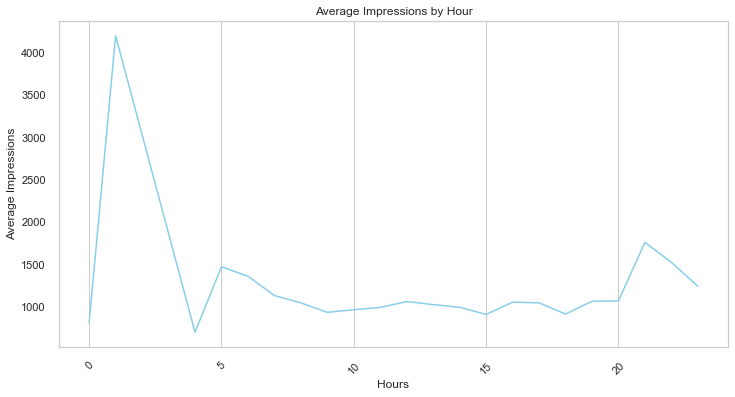

In [61]:
# Plot impressions by hour of day
plt.figure(figsize=(12, 6))
hour_of_day.plot(kind='line', color='skyblue')
plt.title('Average Impressions by Hour')
plt.xlabel('Hours')
plt.ylabel('Average Impressions')
plt.xticks(rotation=45)
plt.grid(axis='y')

The analysis of impressions throughout the day on LinkedIn demonstrates a dynamic pattern. Impressions tend to be at their highest during the early night hours of the day, gradually declining as the day progresses. However, there is a noticeable resurgence in impressions as the day transitions into the late hours. This pattern highlights two distinct peaks in content visibility.

In [34]:
# Explore engagements by month
eng_by_month = df1.groupby('Month')['Engagements'].mean()
#Explore engagements by time of day
eng_by_day = df1.groupby('Time_of_Day')['Engagements'].mean()
#Explore engagements by day of the week
eng_by_day_week = df1.groupby('Day_of_Week')['Engagements'].mean()
#explore engagement by hour of day
eng_hour_of_day = df1.groupby('Hour_of_Day')['Engagements'].mean()

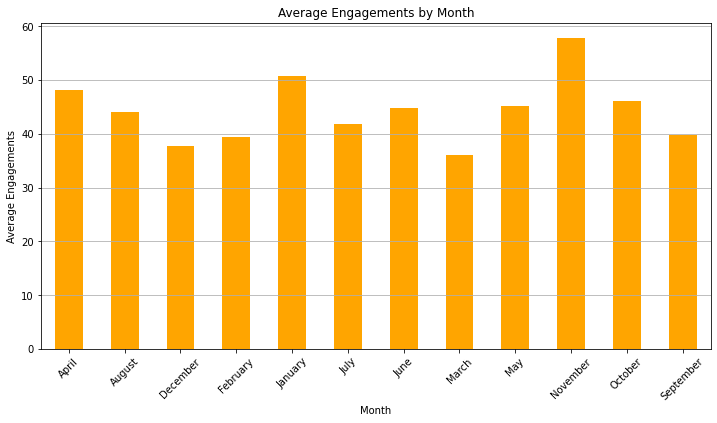

In [35]:
#Plot engagement by month
plt.figure(figsize=(12, 6))
eng_by_month.plot(kind='bar', color='orange')
plt.title('Average Engagements by Month')
plt.xlabel('Month')
plt.ylabel('Average Engagements')
plt.xticks(rotation=45)
plt.grid(axis='y')

The analysis of engagement levels on LinkedIn reveals notable variations across different months, November, January, and April emerge as the months with the highest engagement, indicating peak periods of user interaction with your content. Conversely, March stands out as the month with the least engagement. These monthly trends underscore the influence of seasonality and timing on user interactions, suggesting the need to tailor content strategies to align with these fluctuations and optimize engagement during peak months.

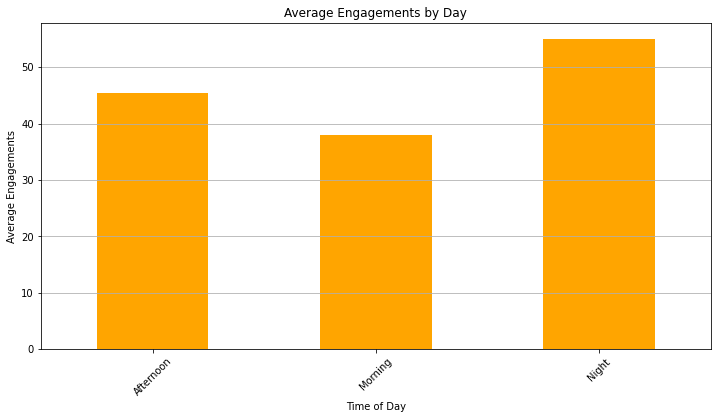

In [37]:
#Plot engagement by time of day
plt.figure(figsize=(12, 6))
eng_by_day .plot(kind='bar', color='orange')
plt.title('Average Engagements by Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Engagements')
plt.xticks(rotation=45)
plt.grid(axis='y')

The analysis of engagement patterns throughout the day reveals intriguing trends. Afternoon hours consistently show strong engagement levels, indicating that users tend to be more active and receptive to content during this period. Conversely, the morning hours exhibit a slight dip in engagement. However, engagement experiences a resurgence during the nighttime, reaching its peak. This daily engagement pattern highlights potential opportunities for content scheduling, with a focus on maximizing interactions during the afternoon and evening, when user activity and interest are at their highest.

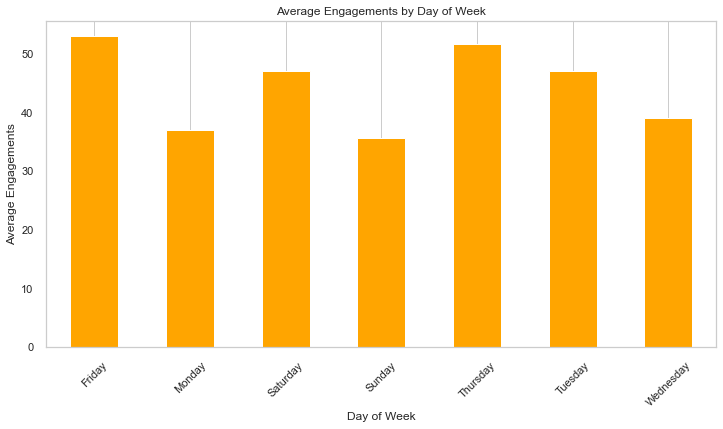

In [69]:
#Plot engagement by day of week
plt.figure(figsize=(12, 6))
eng_by_day_week.plot(kind='bar', color='orange')
plt.title('Average Engagements by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Engagements')
plt.xticks(rotation=45)
plt.grid(axis='y')

The analysis of engagement patterns across the days of the week reveals notable variations. Friday, Saturday, and Thursday stand out as days with robust user engagement, suggesting that users are more active and responsive to content on these days. In contrast, Sunday records the lowest levels of engagement, indicating that users might be less engaged or occupied with other activities on that particular day. Understanding these weekly fluctuations in engagement can inform your content strategy, allowing you to tailor your posts and engagement initiatives to align with the days when user activity and interaction are at their peak.

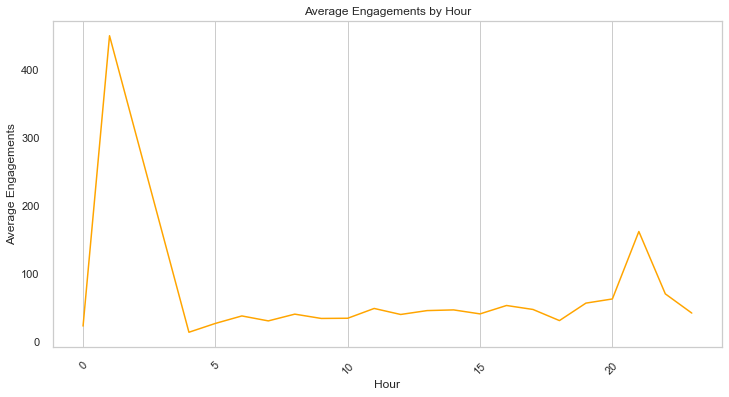

In [70]:
#Plot engagement by Hour
plt.figure(figsize=(12, 6))
eng_hour_of_day.plot(kind='line', color='orange')
plt.title('Average Engagements by Hour')
plt.xlabel('Hour')
plt.ylabel('Average Engagements')
plt.xticks(rotation=45)
plt.grid(axis='y')

The analysis of engagement patterns throughout the day reveals dynamic fluctuations. Engagement levels tend to peak during the early night hours, suggesting that this period is when users are most active and responsive to content. However, as the day progresses, there is a noticeable dip in engagements, possibly due to users' focus on other daytime activities. The engagement trend starts climbing again toward the late hours, indicating that users become more engaged with content during this time.

In [31]:
# Explore comments by month
com_by_month = df1.groupby('Month')['Comments'].mean()
#Explore comments by time of day
com_by_day = df1.groupby('Time_of_Day')['Comments'].mean()
#Explore comments by day of the week
com_by_day_week = df1.groupby('Day_of_Week')['Comments'].mean()
#explore comments by hour of day
com_hour_of_day = df1.groupby('Hour_of_Day')['Comments'].mean()

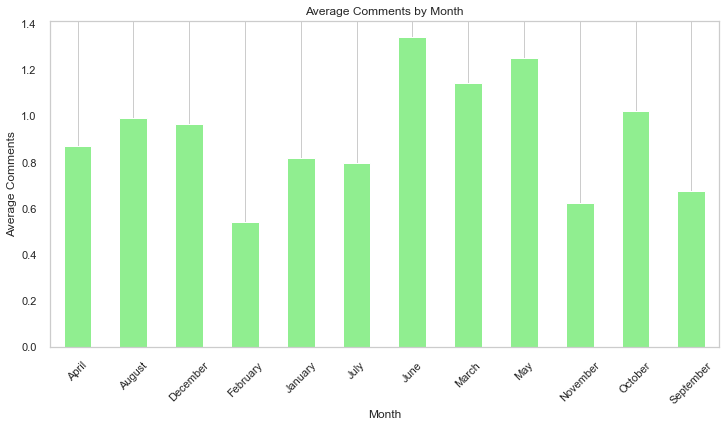

In [74]:
#Plot comments by month
plt.figure(figsize=(12, 6))
com_by_month.plot(kind='bar', color='lightgreen')
plt.title('Average Comments by Month')
plt.xlabel('Month')
plt.ylabel('Average Comments')
plt.xticks(rotation=45)
plt.grid(axis='y')

The analysis of user activity, particularly in terms of comments, provides insights into the months when users were most active in engaging with your content. Notably, the data shows a significant increase in user activity, measured by comments, during the months of March, April, and June. These months stand out as periods when your audience was more inclined to participate in discussions and engage with your posts through comments. Understanding these spikes in activity can help you strategically plan your content and engagement initiatives to capitalize on periods when user interaction is at its peak, potentially fostering even greater engagement and community participation.

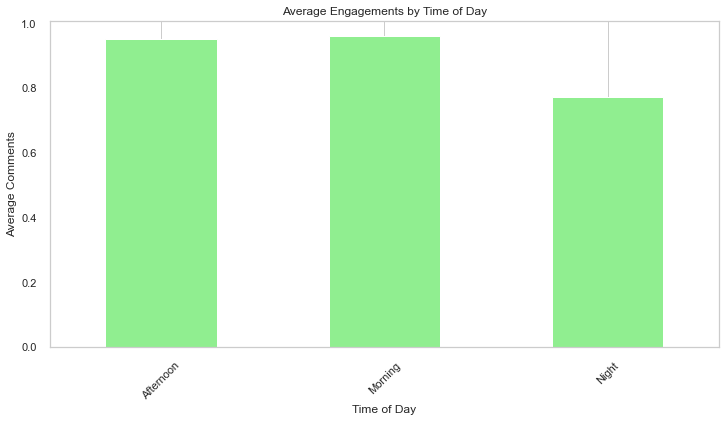

In [75]:
#Plot comments by time of day
plt.figure(figsize=(12, 6))
com_by_day.plot(kind='bar', color='lightgreen')
plt.title('Average Engagements by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Comments')
plt.xticks(rotation=45)
plt.grid(axis='y')

Based on the analysis, it appears that user engagement in terms of comments experiences a decrease during the nighttime, particularly in comparison to the morning and afternoon periods when user activity is more pronounced. This reduction in commenting activity at night suggests that users may be less active in terms of leaving comments during those hours.

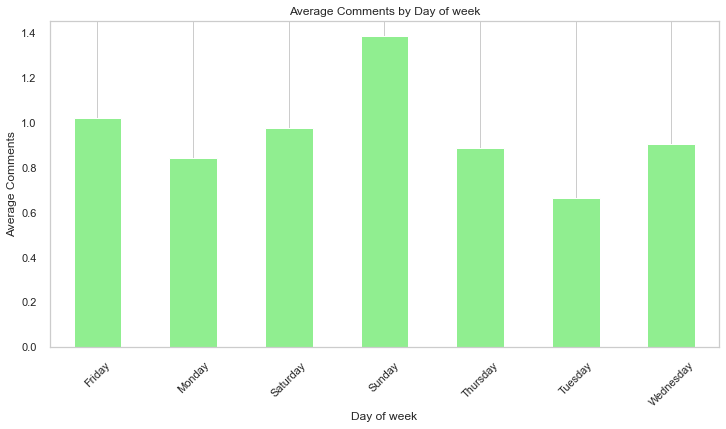

In [80]:
#Plot comments day of the week
plt.figure(figsize=(12, 6))
com_by_day_week.plot(kind='bar', color='lightgreen')
plt.title('Average Comments by Day of week')
plt.xlabel('Day of week')
plt.ylabel('Average Comments')
plt.xticks(rotation=45)
plt.grid(axis='y')

The analysis of user activity in terms of comments reveals interesting variations throughout the week. Sunday emerges as the day when user activity is at its peak, with users actively participating in posts and leaving comments. In contrast, Tuesday stands out as the day with the least commenting activity, suggesting that users may be less inclined to engage through comments on this particular weekday.

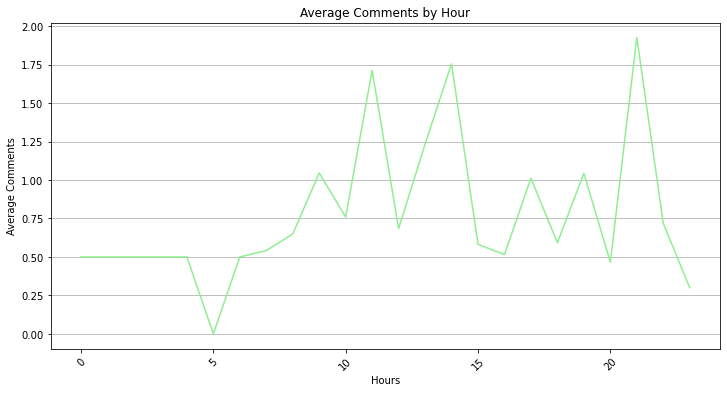

In [32]:
#Plot comments by hour
plt.figure(figsize=(12, 6))
com_hour_of_day.plot(kind='line', color='lightgreen')
plt.title('Average Comments by Hour')
plt.xlabel('Hours')
plt.ylabel('Average Comments')
plt.xticks(rotation=45)
plt.grid(axis='y')

The analysis of user activity throughout the day reveals a dynamic and variable pattern. There is no consistent trend in user engagement across the different hours, indicating that user activity fluctuates throughout the day.

# YEARLY TRENDS

In [83]:
# Define the key metrics to analyze over the years
metrics_to_analyze= ["Impressions", "Engagements","Comments", "Shares"]


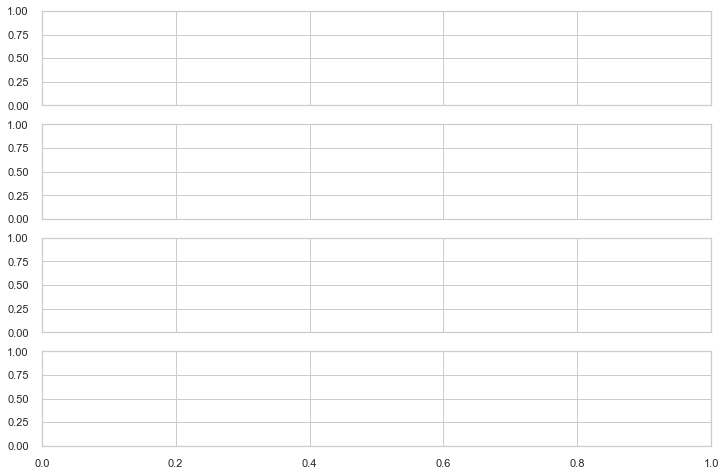

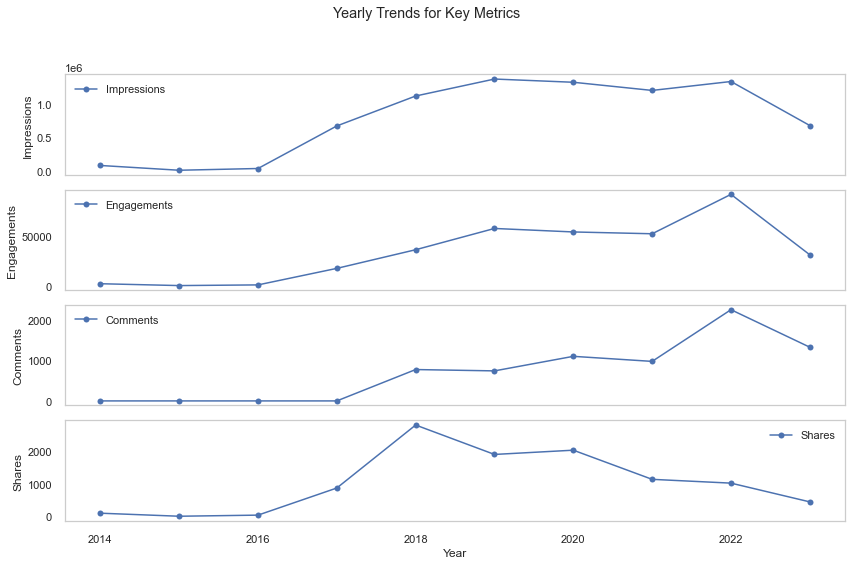

In [84]:
# Create subplots for each metric
fig, axes = plt.subplots(len(metrics_to_analyze), 1, figsize=(12, 8), sharex=True)

# Create subplots for each metric
fig, axes = plt.subplots(len(metrics_to_analyze), 1, figsize=(12, 8), sharex=True)

# Plot each metric over the years
for i, metric in enumerate(metrics_to_analyze):
    ax = axes[i]
    metric_data = df1.groupby('Year')[metric].sum()
    ax.plot(metric_data.index, metric_data.values, marker='o', linestyle='-', label=metric)
    ax.set_ylabel(metric)
    ax.grid()
    ax.legend()

# Set the common x-axis label and title
plt.xlabel('Year')
plt.suptitle('Yearly Trends for Key Metrics')

# Display the plots
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

The analysis of yearly trends for key metrics reveals interesting patterns in user interaction and engagement:

Impressions: Impressions saw a significant increase from 2017, with a minor dip in 2021 before a resurgence in 2022, followed by a subsequent decline.

Engagements: Engagement levels experienced growth in 2017, followed by fluctuations from 2019 to 2021, with a notable increase in 2022 and a subsequent decrease.

Comments: User comments, reflecting user activity, demonstrated growth starting in 2018, reaching its peak in 2022 before declining afterward.

Shares: Sharing activity began to rise in 2016, reaching its peak in 2018 and declining in subsequent years.

These trends highlight the evolving nature of user engagement and interaction with content over the years. Various factors, including changing user behaviors and external events, may have contributed to these fluctuations. Exploring the underlying drivers behind these trends can provide valuable insights for adapting your social media strategy and effectively engaging with your audience in the future.

In [56]:
#create a list of variables to test the relationship against Engagements
#df2 = df1[['Engagements','Likes','Comments', 'Shares', 'Click-Through Rate','Post Link Clicks']]

In [82]:
df2 = df1[['Engagements','Likes','Comments', 'Shares','Post Link Clicks']]

In [83]:
# Define the dependent variable (Y) and independent variables (X)
Y = df2['Engagements']
X = df2.drop(columns=['Engagements'])

In [84]:
# Add a constant term to the independent variables
X = sm.add_constant(X)

# Fit the regression model
linearmodel1 = sm.OLS(Y, X).fit()

# Print the model summary
print(linearmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:            Engagements   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.158e+08
Date:                Sun, 01 Oct 2023   Prob (F-statistic):               0.00
Time:                        14:40:55   Log-Likelihood:                -3606.2
No. Observations:                7729   AIC:                             7222.
Df Residuals:                    7724   BIC:                             7257.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2117      0.006  

The regression analysis results for the LinkedIn dataset indicate a very strong relationship between the dependent variable, "Engagements," and the independent variables, which include "Likes," "Comments," "Shares," and "Post Link Clicks." Let's interpret the results:

R-squared (R²): The R-squared value of 1.000 suggests that all the variance in engagements can be completely explained by the independent variables included in the model. This perfect R-squared value indicates an exceptionally strong relationship between the independent and dependent variables, implying that the model perfectly predicts engagements based on these key metrics.

Coefficients (coef): The coefficients associated with each independent variable represent their impact on engagements. In this case, all coefficients are extremely close to 1.000, with some rounding variations, indicating that each independent variable has an almost one-to-one relationship with engagements.

"Likes" has a coefficient of approximately 0.9994, suggesting that for every one-unit increase in likes, engagements increase by nearly the same amount. This implies a very strong positive relationship between likes and engagements.

"Comments" has a coefficient of approximately 0.9978, indicating that for every one-unit increase in comments, engagements also increase by nearly the same amount. This points to a very strong positive relationship between comments and engagements.

"Shares" has a coefficient of approximately 0.9894, suggesting that for every one-unit increase in shares, engagements increase by almost the same amount. This reveals a very strong positive relationship between shares and engagements.

"Post Link Clicks" has a coefficient of 1.0000, indicating that for every one-unit increase in post link clicks, engagements increase by precisely the same amount. This highlights an exceptionally strong positive relationship between post link clicks and engagements.

In summary, the regression model for LinkedIn engagements demonstrates a perfect fit, with each independent variable having an almost one-to-one positive relationship with engagements. This implies that for every additional like, comment, share, or post link click, there is a nearly equal increase in engagements. The high R-squared value reinforces the model's accuracy in predicting engagements based on these key metrics, making it a powerful tool for understanding and optimizing engagement strategies on LinkedIn.

# Time Series Analysis for Engagements

In [88]:
df3 = df[['Date', 'Engagements']] 
df3.columns = ['ds', 'y']  # Rename columns to 'ds' and 'y' for Prophet

In [89]:
df3.head()

,ds,y
0,7/13/2023 12:03 pm,NaN
1,2023-12-07 20:00:00,NaN
2,2023-12-07 19:00:00,6.0
3,2023-11-07 14:49:00,3.0
4,2023-11-07 09:17:00,19.0


In [90]:
#convert the ds column to date format
df3['ds'] = pd.to_datetime(df3['ds']).dt.date

In [91]:
# Initialize the Prophet model
model = Prophet()

In [92]:
# Fit the model to your data
model.fit(df3)

12:12:52 - cmdstanpy - INFO - Chain [1] start processing
12:12:53 - cmdstanpy - INFO - Chain [1] done processing


In [93]:
# Create a future dataframe for forecasting
future = model.make_future_dataframe(periods=365)

In [94]:
# Make predictions
forecast = model.predict(future)

In [95]:
forecast.tail(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2647,2024-12-02,17.432420,-268.727167,241.923671,7.467875,27.686919,-15.410904,-15.410904,-15.410904,-9.886983,-9.886983,-9.886983,-5.523921,-5.523921,-5.523921,0.0,0.0,0.0,2.021517
2648,2024-12-03,17.379324,-255.734456,260.557367,7.365464,27.676061,-6.033597,-6.033597,-6.033597,2.011460,2.011460,2.011460,-8.045057,-8.045057,-8.045057,0.0,0.0,0.0,11.345727
2649,2024-12-04,17.326228,-249.653497,271.962297,7.271481,27.665203,-11.139638,-11.139638,-11.139638,-0.816472,-0.816472,-0.816472,-10.323167,-10.323167,-10.323167,0.0,0.0,0.0,6.186590
2650,2024-12-05,17.273132,-232.473602,290.221519,7.183541,27.650022,-1.802038,-1.802038,-1.802038,10.509884,10.509884,10.509884,-12.311922,-12.311922,-12.311922,0.0,0.0,0.0,15.471094
2651,2024-12-06,17.220036,-239.296302,266.852457,7.065466,27.634092,-3.776690,-3.776690,-3.776690,10.195367,10.195367,10.195367,-13.972057,-13.972057,-13.972057,0.0,0.0,0.0,13.443346


In [96]:
forecast[['ds', 'yhat']]

,ds,yhat
0,2014-01-07,-55.491164
1,2014-01-08,-59.439488
2,2014-01-09,-49.223196
3,2014-02-06,-42.059004
4,2014-02-09,-68.135768
...,...,...
2647,2024-12-02,2.021517
2648,2024-12-03,11.345727
2649,2024-12-04,6.186590
2650,2024-12-05,15.471094


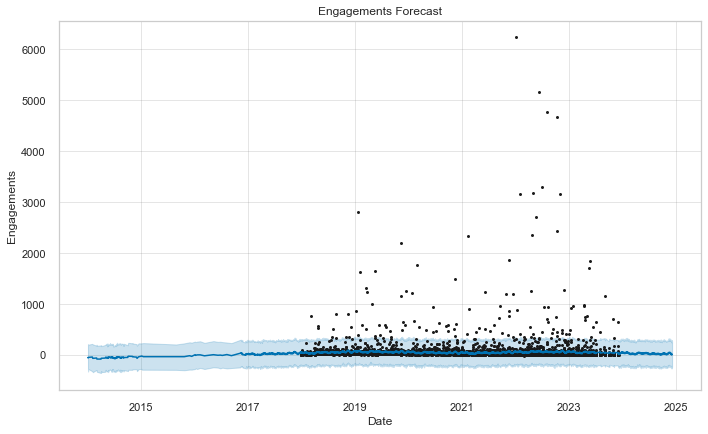

In [97]:
# Plot the forecast
fig = model.plot(forecast)
plt.title('Engagements Forecast')
plt.xlabel('Date')
plt.ylabel('Engagements')
plt.show()

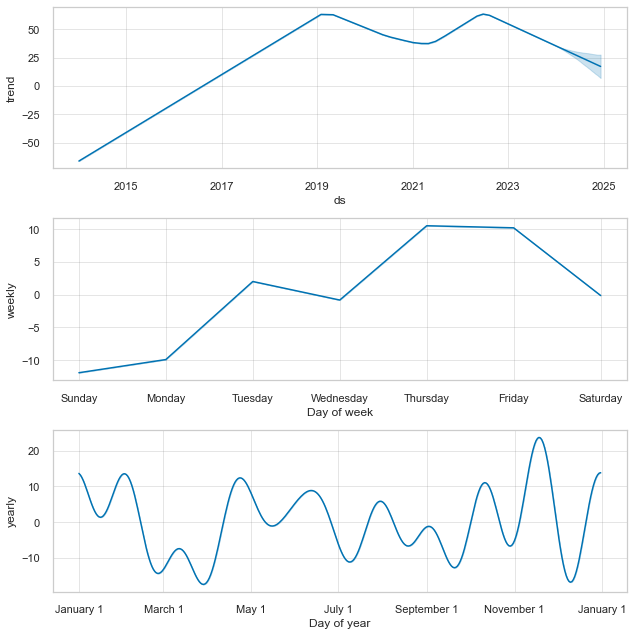

In [98]:
fig2 = model.plot_components(forecast)

# SUMMARY OF FINDINGS

The analysis reveals insights into various content types and their impact on key metrics:
•	Text, Video, and Documents generate high impressions.
•	Documents surprisingly excel in user engagement.
•	Photos and Videos receive the most Likes, emphasizing visual content's appeal.
•	Text and Video content attract more user comments.
•	Photos, Videos, and Links are frequently shared, extending their reach.

This LinkedIn engagement chart offers insights into user interactions across months. Impressions exhibit a consistent pattern, suggesting stability in content engagement. February shows a minor dip in Impressions, warranting investigation into potential contributing factors. Overall, the data indicates a steady trend with subtle monthly variations.

The analysis of LinkedIn impressions during the day indicates a consistent trend in content visibility, with minimal fluctuations. However, a subtle improvement is observed during nighttime hours, suggesting a slight increase in content visibility and user engagement in the evening and nighttime. While not a significant shift, it highlights a potential opportunity to optimize content scheduling for these hours.

The analysis of LinkedIn impressions throughout the days of the week highlights a generally stable impression trend on most weekdays. However, Thursdays, Fridays, and Saturdays show a subtle uptick in impressions, indicating increased content visibility and user engagement during these days. While the difference is not dramatic, it suggests that these three days offer favorable opportunities for content posting and audience engagement compared to other weekdays.

The analysis of LinkedIn engagement levels uncovers significant monthly variations, with November, January, and April standing out as the months with the highest engagement. In contrast, March records the lowest engagement levels. These monthly trends emphasize the impact of seasonality and timing on user interactions, highlighting the importance of adapting content strategies to align with these fluctuations and maximize engagement during peak months.

The analysis of daily engagement patterns on LinkedIn uncovers interesting trends. Afternoon hours consistently display robust engagement levels, suggesting that users are more active and responsive to content during this time. In contrast, the morning hours show a slight dip in engagement. However, engagement surges during the nighttime, reaching its peak.

The analysis of engagement patterns across the days of the week highlights significant variations. Friday, Saturday, and Thursday emerge as days with robust user engagement, indicating higher user activity and responsiveness to content. Conversely, Sunday records the lowest levels of engagement, suggesting reduced user interaction, possibly due to other commitments or priorities on that day.

The analysis of user activity, especially in terms of comments, offers valuable insights into the months when users were most active in engaging with your content. March, April, and June emerge as standout months, characterized by a substantial increase in user activity, as evidenced by higher comment counts. These periods indicate a heightened willingness of your audience to participate in discussions and interact with your posts through comments.

The analysis suggests that user engagement, specifically in terms of comments, undergoes a decline during nighttime hours compared to the morning and afternoon periods when user activity is more prominent. This decrease in commenting activity at night indicates that users tend to be less active in leaving comments during those hours, potentially being occupied with other activities or having reduced online interaction during nighttime.

The analysis of user activity in terms of comments unveils intriguing variations across the days of the week. Sunday stands out as the day when user activity reaches its peak, with users actively participating in posts and leaving comments. Conversely, Tuesday appears to be the day with the lowest commenting activity, indicating that users might be less inclined to engage through comments on this particular weekday.

 Impressions: Impressions witnessed a substantial upswing starting in 2017, although there was a minor dip in 2021. Impressions peaked in 2022 but subsequently declined. These fluctuations highlight the dynamic nature of content visibility and reach over the years.
 
Engagements: Engagement levels displayed growth in 2017, with fluctuations observed from 2019 to 2021. A significant increase in engagement occurred in 2022, followed by a decrease. These trends suggest evolving user behaviors and interactions with content.

Comments: User comments, indicating user activity and participation, exhibited growth beginning in 2018, reaching their highest point in 2022. However, comments declined after 2022, indicating changes in user engagement and interaction patterns.

Shares: Sharing activity started to increase in 2016, peaking in 2018, but subsequently showed a declining trend. This reflects changes in user sharing behaviors and content distribution over the years.

The regression analysis suggests that "Impressions," "Likes," and "Comments" have a positive impact on user engagements, while "Shares" have a negative impact. However, it's important to consider the practical implications of these findings. For instance, while shares may reduce direct engagements, they can still contribute to content visibility and brand exposure, potentially leading to indirect engagement through increased impressions and reach.



# RECOMMENDATION

Based on the comprehensive analysis of LinkedIn engagement and user interaction patterns, here are some detailed recommendations to optimize your LinkedIn content strategy:

Content Type Diversity: Maintain a diverse content strategy that includes a mix of text, video, documents, photos, and links. While text and video perform well in terms of impressions and engagement, documents have shown surprising potential for high user engagement. Keep experimenting with different content formats to capture a wider audience.

Visual Content Emphasis: Visual content, such as photos and videos, consistently receives higher likes and shares. Therefore, prioritize the creation of visually appealing and informative content. Utilize storytelling techniques through visuals to connect with your audience effectively.

Comments and Engagement: Content that encourages user comments and engagement, particularly during the afternoon and evening hours, tends to perform better. Focus on creating content that sparks discussions and interactions among your audience. Leverage trends, ask questions, and seek opinions to drive meaningful conversations.

Peak Posting Times: Schedule your content to align with peak engagement times, which are typically in the afternoon and evening. Take advantage of the increased user activity during these periods to maximize the reach and impact of your posts.

Weekly Posting Strategy: Consider focusing your content efforts on Thursdays, Fridays, and Saturdays, as these days exhibit slightly higher content visibility and user engagement. However, maintain a consistent posting schedule throughout the week to ensure a continuous online presence.

Monthly Adaptation: Recognize the influence of seasonality on user interactions. Tailor your content strategies to align with peak engagement months like November, January, and April. Invest in targeted campaigns and promotions during these periods to capitalize on higher user activity.

Yearly Trends: Stay attuned to yearly trends in key metrics like impressions, engagements, comments, and shares. Adjust your content and engagement strategies based on these trends to maintain a dynamic and responsive approach to user behavior.

Community Building: Foster a sense of community and engagement on your LinkedIn profile. Respond promptly to comments, engage in discussions, and acknowledge user contributions. Building a strong LinkedIn community can enhance long-term engagement and loyalty.

Performance Tracking: Continuously monitor the performance of your LinkedIn content by analyzing key metrics. Use LinkedIn Analytics to gain insights into what's working and what's not. Adjust your strategy based on data-driven decisions to ensure consistent growth and engagement.

Content Experimentation: Don't hesitate to try new content ideas, formats, and storytelling approaches. Regularly A/B test your content to identify which types resonate most with your audience. Adapt and refine your strategy based on the results of these experiments.

Adapt to Algorithm Changes: Stay informed about LinkedIn's algorithm updates and adapt your strategy accordingly. Understanding how the platform prioritizes content can help you tailor your posts for maximum visibility.

Competitor Analysis: Keep an eye on your competitors and industry leaders to learn from their successful strategies. Identify content gaps in your niche and seek opportunities to offer unique and valuable insights to your audience.

By implementing these recommendations and staying agile in response to changing user behavior and platform dynamics, you can effectively boost engagement, grow your LinkedIn presence, and foster meaningful connections with your audience.